

# Project: Medical Appointment No Shows Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Medical Appointment No Shows**

I chose to work this dataset to explore and find why patients miss there appointments.
 
This dataset has information from 100k medical appointments in Brazil. A number of characteristics about the patient are
included in each row. The dataset consists of some features that represent the patient appointment case such as age, schedule date, gender, and the most important variable show up.

**Some interesting Questions**

The first and the most important question is, why patient miss their show up?

We also, try to figure out if missing a show up has any relation or pattern with any of
age, gender, the actual appointment day or financial aid or not.
Who visits the doctors more?


In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,norm
import numpy as np

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [35]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

data = pd.read_csv('KaggleV2-May-2016.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [36]:
data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775120e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [37]:
# get general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The First step after loading data is getting some information about our data.

**From this info() method we can conclude that:**

- The dataset consists of 110527 rows or records.
- It has 14 columns (13 independent variable and 1 dependent variable).
- There are no any missing values
- Both ScheduledDay and AppointmentDay saved as string not date
- The dataset size is 11.8 MB.

In [38]:
# get some basic descriptive statistics about the dataset
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**From this statistical information about the numerical data**

We can the Age variable has some negative values and large which is not realistic, we will do more exploration and handle this error.
There are binary variables. 

In [39]:
# check for duplicates
data.duplicated().sum()

0

We can see that our dataset has no duplicates

### Fixing Data

In [41]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Firstly, we will rename columns to lowercase to make names consistent and avoid confusing

In [42]:
#Renaming columns
data.rename(columns = lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [43]:
# check columns name change
data.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [44]:
# convert both scheduleday and appointmentday to date.
data['scheduledday'] = pd.to_datetime(data['scheduledday']).astype('datetime64[ns]')
data['appointmentday'] = pd.to_datetime(data['appointmentday'].astype('datetime64[ns]'))

In [46]:
#check if date changed from string into datetime type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   patientid       110527 non-null  float64       
 1   appointmentid   110527 non-null  int64         
 2   gender          110527 non-null  object        
 3   scheduledday    110527 non-null  datetime64[ns]
 4   appointmentday  110527 non-null  datetime64[ns]
 5   age             110527 non-null  int64         
 6   neighbourhood   110527 non-null  object        
 7   scholarship     110527 non-null  int64         
 8   hipertension    110527 non-null  int64         
 9   diabetes        110527 non-null  int64         
 10  alcoholism      110527 non-null  int64         
 11  handcap         110527 non-null  int64         
 12  sms_received    110527 non-null  int64         
 13  no_show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

We converted both scheduleday and appointmentday from string to datatime type to be able to handle them and explore them more.

In [54]:
data['appointmentid'].nunique()

110527

In [55]:
data['patientid'].nunique()

61744

We can conclude from these two features that on average the patient has 2 visits for the hospital.

In [56]:
data['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [67]:
# patient with age less than 0
print("Number of patients with age less than zero: ", data[data['age'] <0].shape[0])

Number of patient with age less than zero:  1


In [69]:
# patient with age equal to 0
print("Number of patients with age less than zero: ", data[data['age'] == 0].shape[0])

Number of patients with age less than zero:  3539


In [70]:
# patient with age larger than 100
print("Number of patients with age larger than 100: ",data[data['age'] > 100].shape[0])

Number of patients with age larger than 100:  7


From the preceding cells we can conclude that:

- There is one patient with negative which doesn't make sense, thus we will drop it as it may be an error.
- There are 3539 patients with age equal to zero, these patients could be babies with only months as age variable in years.
- There are 7 patients with age larger than 100 years old, it may be error or real value. I prefer to test the model with and without it as it may be outliers.

In [72]:
# drop patient with -1 year old.
data.drop(data[data['age'] == -1].index, axis=0, inplace=True)

In [73]:
# check for negative values
data['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

<a id='eda'></a>
## Exploratory Data Analysis


### Who visits the physicians more? 

#### Target Variable 

We will start by exploring the target variable (no-show)

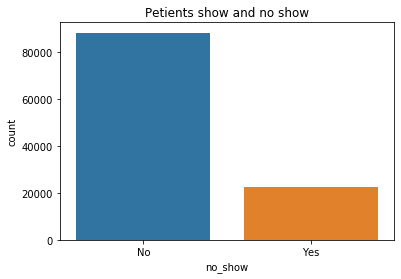

In [100]:
# exploring the distribution of the target variable (no-show)
ax = sns.countplot(x=data['no_show'], data=data)
ax.set_title("Petients show and no show")
plt.show()

In [91]:
# number of patients that missed the appointment
print("Number of patients that missed the appointments is: ", data[data['no_show'] == 'Yes'].shape[0],
      "Number of patients that have the appointments is: ", data[data['no_show'] == 'No'].shape[0])

Number of patients that missed the appointments is:  22319 Number of patients that have the appointments is:  88207


From the bar chart, we can see that nearly 25% of patients didn't have the change to show up.
And this is our target.

The dataset is imbalance and this is a serious issue, that we will handle it in the classification step.

#### Age variable effect

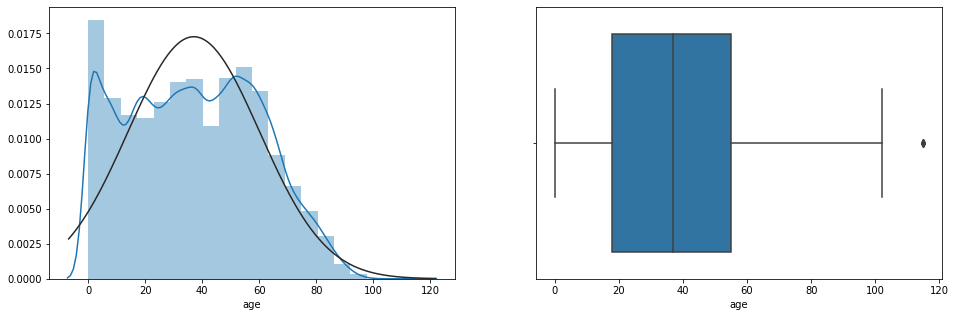

In [116]:
f,ax = plt.subplots(1,2,figsize=(16,5))
sns.distplot(data['age'],fit=norm,ax=ax[0], bins=20)
sns.boxplot(data['age'])
plt.show()

From the distribution figure, we can see that **age** variable far a little from the normal distribution.
The distribution is nearly skew to right as there some age larger than 100 years old.

From the box plot, it is clear that there are a few data points that can be considered as outliers.

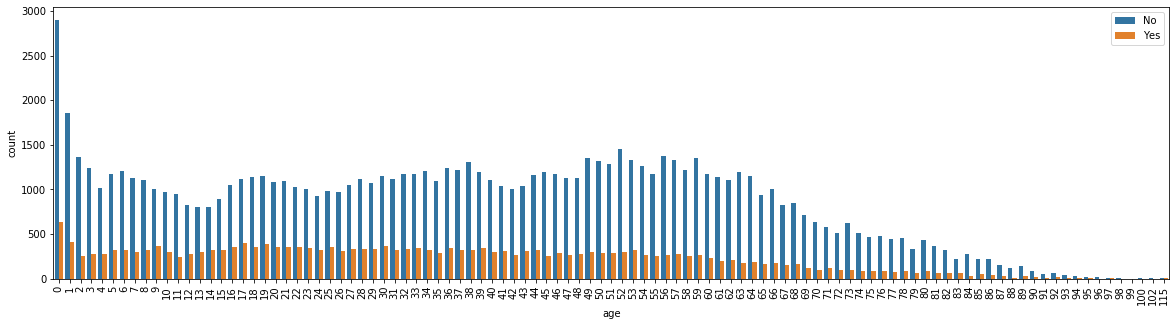

In [201]:
plt.figure(figsize=(20,5))
sns.countplot(x='age', hue='no_show', data=data);
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

> We can see that patients with age 0 and 1 shows a high count for appointment. They have a high rate for showing an appointment and also a high rate for not showing an appointment.

> I think what will happened if we divided the age variable into categories.


In [180]:
# bin the age with base 5 
bin_ranges = np.arange(0,data['age'].max(),5)

data['age_bins'] = pd.cut(data['age'],bin_ranges)

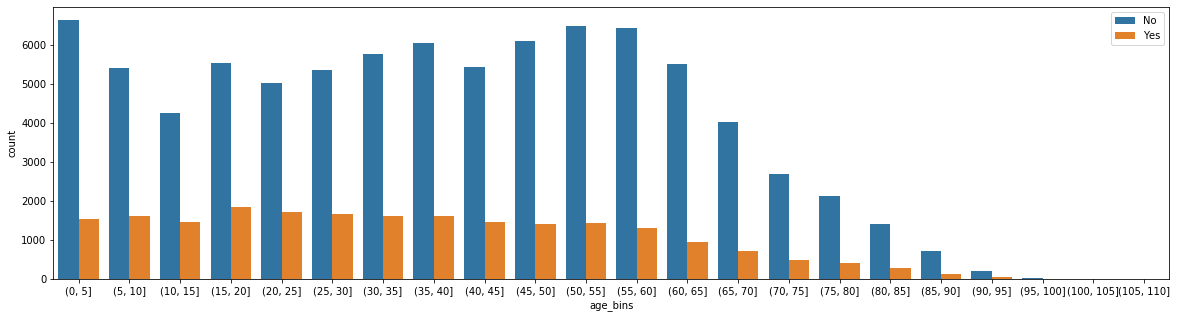

In [181]:
plt.figure(figsize=(20,5))
sns.countplot(x='age_bins', hue='no_show', data=data);
plt.legend(loc='upper right')
plt.show()

Well, I don't think it gives us more insights. But I can notice that age period (15,20) has the hightest rate of no-show.

#### Gender variable effect

In this subsection, we will try to figure out if there are any relationships between gender and show up appointment

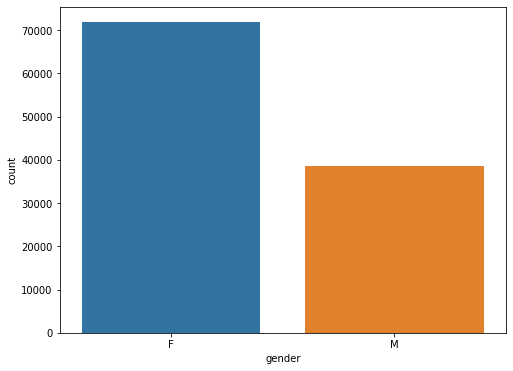

In [187]:
plt.figure(figsize=(8,6))
sns.countplot(data['gender']);

In [202]:
print("Number of Female patients: ", data[data['gender'] == 'F'].shape[0],
      "Number of Male patients: ", data[data['gender'] == 'M'].shape[0])

Number of Female patients:  71839 Number of Male patients:  38687


> It is clear that most of the patients are females, as they visit the doctors nearly 2 times than males. Thus, It may be an important factor.

> I will dig in more to find any relationship between gender and show up an appointment. 

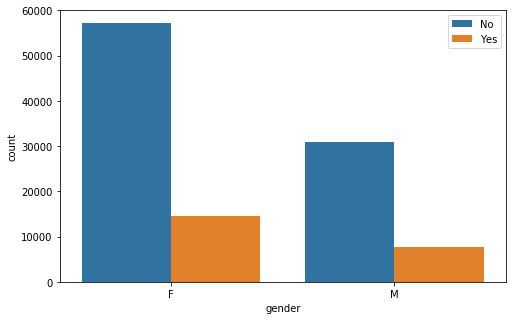

In [212]:
plt.figure(figsize=(8,5))
sns.countplot(x='gender', hue='no_show', data=data);
plt.legend(loc='upper right')
plt.show()

In [225]:
data.groupby('no_show')['gender'].value_counts()

no_show  gender
No       F         57245
         M         30962
Yes      F         14594
         M          7725
Name: gender, dtype: int64

From the above figure, we can see that both females and males miss their appointments nearly equally.
Thus, after this exploration I think gender don't have any impact or slightly impact on the appointment show up.

**I will try to find any correlation between age and gender in visiting doctors**

In the next cell, I will plot count of both genders to visit the doctors based on age.

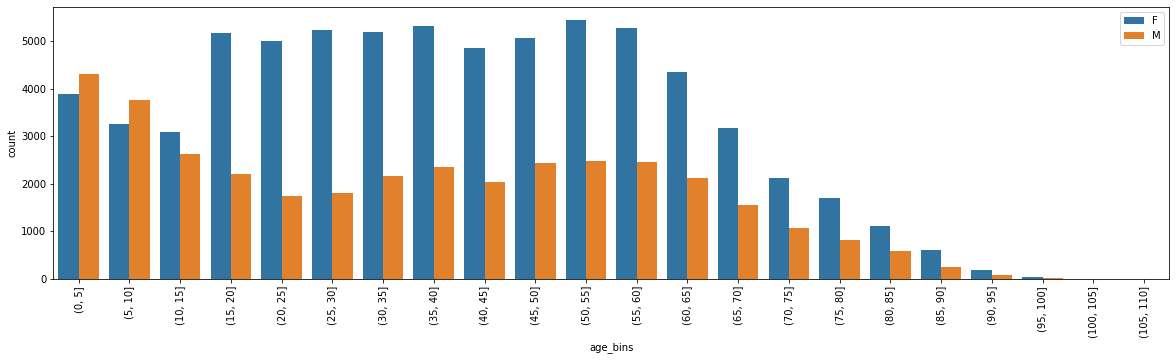

In [253]:
plt.figure(figsize=(20,5))
sns.countplot(x='age_bins', hue='gender', data=data);
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

It is clear that, untill age 10 Males visit the doctor more than Females. After age 10, Females visit the doctors 2 times than Males.

In [254]:
data.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show',
       'age_bins'],
      dtype='object')

#### Schedule Day 

In this subsection, we will try to explore the schedule days to find more insights about the show up.

In [281]:
# get the name of the day from both schedule and appointment days
data['scheduledday_name'] = data['scheduledday'].dt.day_name()
# data['appointmentday_name'] = data['appointmentday'].dt.day_name()

week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

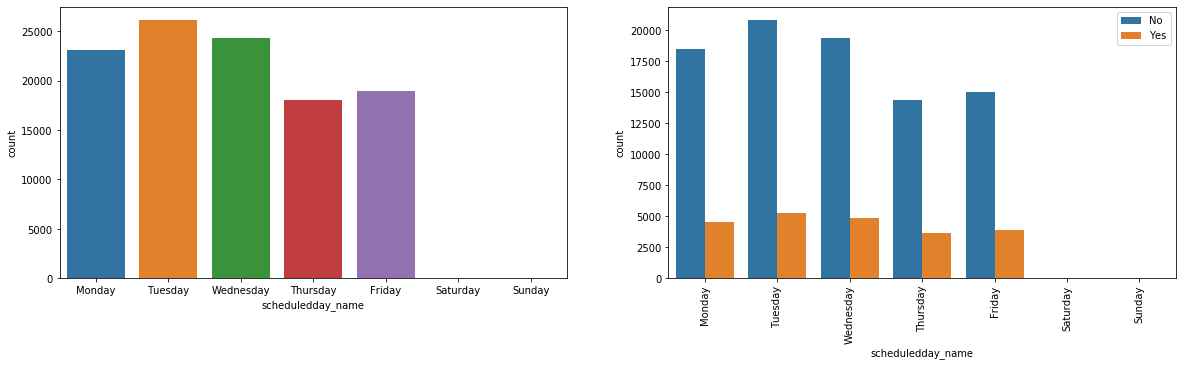

In [292]:
f, ax = plt.subplots(1,2, figsize=(20,5))
# plt.figure()
sns.countplot(x=data['scheduledday_name'], order=week_order, ax=ax[0]);
sns.countplot(x='scheduledday_name', hue='no_show', data=data, order=week_order);
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

**From the above visulization we can find that:**

- It seems that the center or the hospital receive only 24 calls for appointments in Saturday and didn't receive any calls for an appointment in Sunday, the weekend.

- It is slightly high that patients call for an appointments in day, Monday, Tuesday, Wendsday, to have a show up.

### Is the scholarship has an impact on show up?

In this subsection, we will try to figure out if scholarship has an impact on showing up or not.

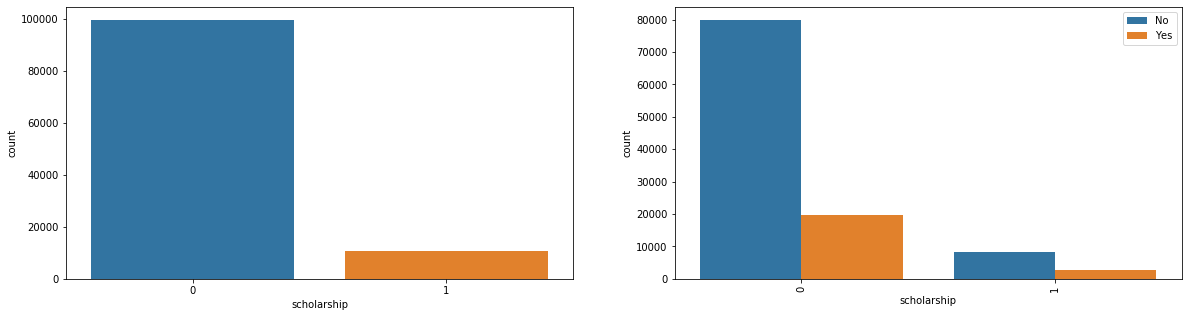

In [313]:
f, ax = plt.subplots(1,2, figsize=(20,5))
# plt.figure()
sns.countplot(x=data['scholarship'],ax=ax[0]);
sns.countplot(x='scholarship', hue='no_show', data=data);
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

In [318]:
data.groupby('no_show')['scholarship'].value_counts()

no_show  scholarship
No       0              79924
         1               8283
Yes      0              19741
         1               2578
Name: scholarship, dtype: int64

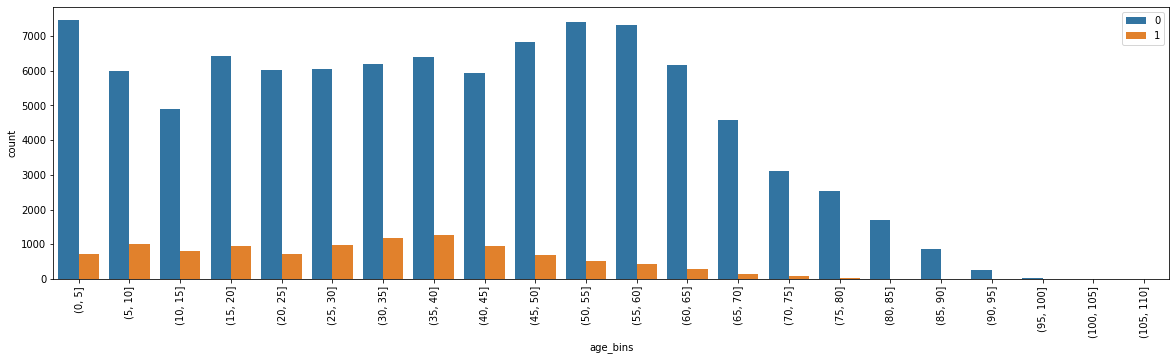

In [322]:
plt.figure(figsize=(20,5))
sns.countplot(x='age_bins', hue='scholarship', data=data);
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

From the above figures, We can see that:

- a little number of patients has a scholarship.

- nearly 80% of patients without scholarship have a show up.

- nearly 75% of patients with a scholarship have a show up.

- patients in ages from 30 to 45 seems to miss their appointment.



<a id='conclusions'></a>
## Conclusions


**To conclude the results**

> It is clear that **age** feature is an important feature and slightly has an impact on determination if the patient will take an appointment or not.

> We found that Males at age 10 visit the doctor more than Females. After age 10, Females visit the doctors 2 times than Males.

> Scholarship is a great motivation for the patients to take an appointment.